## EM Russia ##
### relationship between currency rate - inflation - stockexchange ###

an attempt to use free available data sources, and to investigate if there is any predictive aspect to this


- The parameter that is lacking, is politics. (howto to quantify this?)
- Russia has been fighting inflation

$$\alpha\beta\gamma\Delta\Gamma$$

In [1]:
import requests     # 2.18.4
import pandas as pd # 0.23.0
import io
import datetime

In [2]:
today = datetime.datetime.now().strftime('%Y-%m-%d')
print ("this report is valid till : ", today)

this report is valid till :  2022-01-26


In [3]:
# Building blocks for the URL
#entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/' # Using protocol 'https'
#resource = 'data'           # The resource for data queries is always'data'
#flowRef ='EXR'              # Dataflow describing the data that needs to be returned, exchange rates in this case
#key = 'D.RUB.EUR.SP00.A'    # Defining the dimension values, explained below

# Define the parameters#
#parameters = {
 #   'startPeriod': '2013-12-01',  # Start date of the time series
#    'endPeriod': '2021-12-29'     # End of the time series
  #  'endPeriod': today     # End of the time series
#}

In [4]:
# Construct the URL: https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A
#request_url = entrypoint + resource + '/'+ flowRef + '/' + key

# Make the HTTP request
#response = requests.get(request_url, params=parameters)

# Check if the response returns succesfully with response code 200
#print(response)

# Print the full URL
#print(response.url)

In [5]:
# Print the first 1000 characters of the response
#print(response.text[0:1000])

In [6]:
# Make the HTTP request again, now requesting for CSV format
#response = requests.get(request_url, params=parameters, headers={'Accept': 'text/csv'})
# Response succesful? (Response code 200)
#print(response)

In [7]:
# Print the first 1000 characters to inspect the response
#response.text[0:1000]

In [8]:
# Read the response as a file into a Pandas DataFrame
#df = pd.read_csv(io.StringIO(response.text))

In [9]:
#df

In [10]:
# Check the DataFrame's information
#df.info()

In [11]:
# Show the last 5 entries of the DataFrame
#df.tail()

In [12]:
# Inspect the prices. Do the mean, minimum and maximum make sense?
#df['OBS_VALUE'].describe()

In [13]:
# Create a new DataFrame called 'ts'
#ts = df.filter(['TIME_PERIOD', 'OBS_VALUE'], axis=1)
# 'TIME_PERIOD' was of type 'object' (as seen in df.info). Convert it to datetime first
#ts['TIME_PERIOD'] = pd.to_datetime(ts['TIME_PERIOD'])
# Set 'TIME_PERIOD' to be the index
#ts = ts.set_index('TIME_PERIOD')
# Print the last 5 rows to screen
#ts.tail(10)

In [14]:
#%matplotlib inline
#ts.plot()

Russian rubel against EURO - data taken from ECB



In [15]:
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

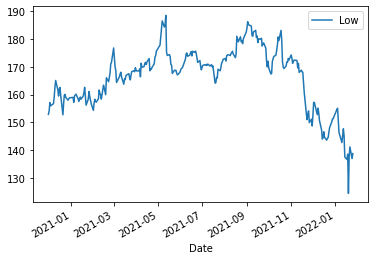

In [16]:
dft = yf.download("MOEX.ME",start='2020-12-01',end=today)
#dft.info()
#dft.tail(10)

#guess if you want to buy Low is more informative than high ;)
dftfil=dft.filter(['Low'])

#%matplotlib inline
dftfil.plot()

*Public Joint-Stock Company Moscow Exchange MICEX-RTS (MOEX.ME)
MCX - MCX Real Time Price. Currency in RUB*



*is there a way to get a headstart in information about currency : libor rate, cds ... ?*

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

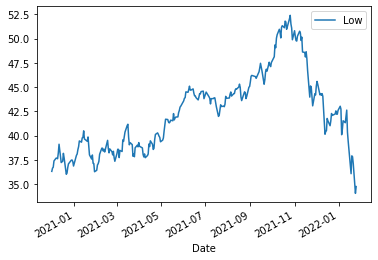

In [17]:
dft = yf.download("ERUS",start='2020-12-01',end=today)
dftfil=dft.filter(['Low'])
dftfil.plot()

*this is an ETF on russian companies*


- Gazprom PJSC	GAZP	14.29%
- Sberbank of Russia PJSC	SBER	13.11%
- PJSC Lukoil	LKOH	11.75%
- Mining and Metallurgical Company NORILSK NICKEL PJSC	GMKN	5.58%
- NOVATEK PJSC GDR	NVTK	4.97%
- Yandex NV Shs Class-A-	YNDX	4.74%
- TCS Group Holding PLC GDR Repr Class -A- Reg-S	TCS	4.54%
- Tatneft PJSC	TATN	4.10%
- Rosneft Oil Co	ROSN	3.33%
- Polyus PJSC	PLZL	3.06%



[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

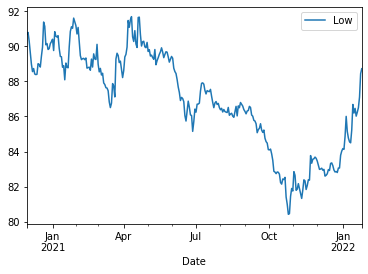

In [18]:
dftidr = yf.download("EURRUB=X",start='2020-12-01',end=today)
dftfilidr =dftidr.filter(['Low'])
dftfilidr.plot()

*this is russian rubel against the euro*

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

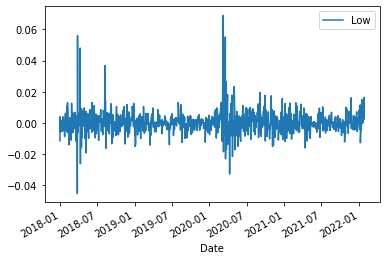

In [19]:

dftidr = yf.download("RUB=X",start='2018-01-01',end=today)
dftfilidr =dftidr.filter(['Low'])
dftfilidr.pct_change(periods=1).plot()


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

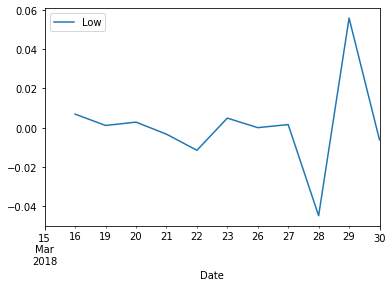

In [20]:
dftidr = yf.download("RUB=X",start='2018-03-15',end='2018-04-01')
dftfilidr =dftidr.filter(['Low'])
dftfilidr.pct_change(periods=1).plot()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

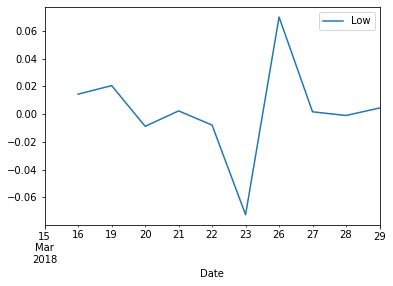

In [23]:
#so date seems to be 27 march 2018, let's check stock exchange
dft = yf.download("MOEX.ME",start='2018-03-15',end='2018-03-30')
dftfil=dft.filter(['Low'])
dftfil.pct_change().plot()

stockmarket precedes FX-market (different to turkey) so no warning function in exchange-rate ....